In [54]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [70]:
# Linear Regression  
class LinearRegression():
      
    def __init__(self, alpha=0.01, n_iters=1000, batch_size=None, error_metric='rmse', l1= 0, l2= 0):
        self.alpha = alpha  
        self.n_iters = n_iters
        self.error_metric = error_metric
        self.batch_size = batch_size
        self.l1 = l1
        self.l2 = l2
    
    def rank(self, X):
        rank = np.linalg.matrix_rank(X)
        return rank
    
    def checkFullRank(self, X):
        rank = self.rank(X)
        if rank == min (X.shape):
            self.FullRank = True
        else:
            self.FullRank = False
            
    def checkLowRank(self, X):
        if X.shape[1] <= X.shape[0]:
            self.LowRank = True
        else:
            self.LowRank = False
        
    def normalEquation(self, X, y):
        self.checkFullRank(X_train)
        self.checkLowRank(X_train)
        X = np.column_stack([np.ones(X.shape[0]), X])
        if self.FullRank and not self.LowRank:
            np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    # Function for model training        
    def fit( self, X, y ) :
          
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
        
        # weight initialization 
        self.w = np.zeros( self.n ).reshape(-1,1)
          
        self.b = 0
        self.X = X
        self.y = y

        self.w_history = []
        self.b_history = []
        
        self.error =[]
        # gradient descent learning
                  
        for i in tqdm(range( self.n_iters )):
            
            if self.batch_size: # if not self.batch_size
                idx = np.random.choice(len(X), self.batch_size, replace=False)
                self.X = X[idx]
                self.y = y[idx]  
                
            self.gradient_descent()
            
            self.w_history.append(self.w)
            self.b_history.append(self.b) 
            
            if self.error_metric=='rmse':
                self.error.append(self.rmse(self.X, self.y))
            elif self.error_metric=='mse':
                self.error.append(self.mse(self.X, self.y))
            else:
                self.error.append(self.mae(self.X, self.y))
                
        self.weight = np.append([self.b], self.w)
  
        return np.append([self.b], self.w), self.plot_cost()
      
    # Helper function to update weights in gradient descent
      
    def gradient_descent( self ) :    
        y_pred = self.predict(self.X )
          
        # calculate gradients  
        L1 = self.l1 * np.sign(self.w)
        L2 = self.l2 * (self.w) 
            
        dw = - ( 2 * ( self.X.T ).dot( self.y - y_pred )  ) / self.m + L1 + L2
        db = - 2 * np.sum( self.y - y_pred ) / self.m 
          
        # update weights
        self.w = self.w - self.alpha * dw
        self.b = self.b - self.alpha * db
        
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ):
        return X.dot( self.w ) + self.b   
    
    def rmse(self, X, y):
        y_pred = self.predict(X)
        l1_reg = self.l1 * np.sum(np.abs(self.w))
        l2_reg = self.l2 * np.sum(self.w ** 2)
            
        return ((np.sqrt(((y_pred - y) ** 2).mean())) + l2_reg + l1_reg)
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        l1_reg = self.l1 * np.sum(np.abs(self.w))
        l2_reg = self.l2 * np.sum(self.w ** 2)
                             
        return ((((y_pred - y) ** 2).mean())/2 + l2_reg + l1_reg)
    
    def mae(self, X, y):
        y_pred = self.predict(X)
        l1_reg = self.l1 * np.sum(np.abs(self.w))
        l2_reg = self.l2 * np.sum(self.w ** 2)
        
        return ((np.abs(y_pred - y)).mean() + l1_reg + l2_reg)
    
    def score(self):
        if self.error_metric == 'rmse':
            return self.rmse(self.X, self.y)
        elif self.error_metric == 'mse':
            return self.mse(self.X, self.y)
        else:
            return self.mae(self.X, self.y)
    
    def model_parameter(self):
        print(f"Learing rate is: {self.alpha}")
        print(f"No. of Iterations: {self.n_iters}")
        print(f"Error:{self.error_metric} = {self.score()}")
        print(f"Weights for the model are:{self.weight}")
        
        # Method for getting a dataframe for weights
    def print_weight_history(self):
        thetas = pd.DataFrame(np.array(self.w_history).reshape(self.n_iters,self.n))
        B =pd.DataFrame(np.array(self.b_history).reshape(self.n_iters,1), columns=['bias'])
        weights = pd.concat([B, thetas], axis=1)
        return weights
    
    def plot_cost(self):
        errors = np.asarray(self.error)
        plt.plot(errors)
        plt.title("Number of iterations vs Error")
        plt.xlabel("Number of iterations")
        plt.ylabel("Error")

In [71]:
class data_manipulation():
    
    def splitData(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
        return X_train, X_test, y_train, y_test
 
    def normalize_train_test(self, X1, X2):
        mean = np.mean(X1, axis=0) 
        std = np.std(X1, axis=0)
        X_train_norm = (X1 - mean)/std
        X_test_norm = (X2 - mean)/std
        return X_train_norm, X_test_norm

# Made a pipeline to make a data frame for Weights

In [72]:
#cols= ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13']
#thetas = pd.DataFrame(np.array(lr.W_history).reshape(5000,13), columns=cols)
#B =pd.DataFrame(np.array(lr.b_history).reshape(5000,1), columns=['bias'])
#weight = pd.concat([B, thetas], axis=1)

In [73]:
column_name = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14']
df = pd.read_csv('C:/Users/suraj/Desktop/ML Class/lab 1/housing.csv' , names=column_name, header=None)

In [74]:
X = df.values[:, :-1]
y = df.values[:, -1]
y = y.reshape(-1,1)

d = data_manipulation()
X_train, X_test, y_train, y_test = d.splitData(X, y)
X_train_norm, X_test_norm = d.normalize_train_test(X_train, X_test)

In [75]:
lrd = LinearRegression(alpha=0.001, n_iters= 5000, error_metric='rsme')

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5966.57it/s]


(array([22.74445787, -0.8994269 ,  0.80901311, -0.27288837,  0.68089773,
        -1.40507432,  2.90196491, -0.38069866, -2.72166221,  1.0627748 ,
        -0.87786194, -2.18836035,  0.59395173, -3.34608329]),
 None)

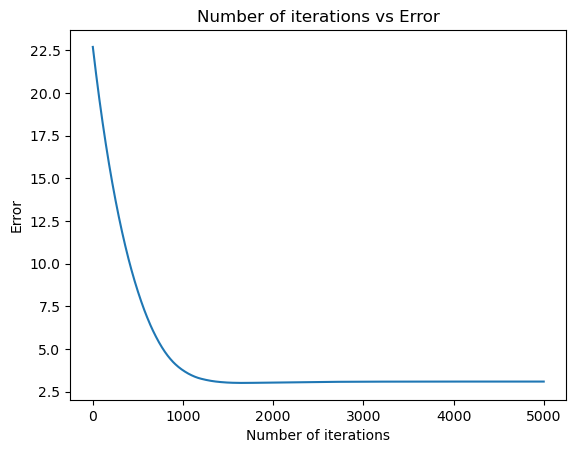

In [76]:
lrd.fit(X_train_norm, y_train)

In [77]:
lrd.normalEquation(X_train_norm, y_train)

array([[22.74548023],
       [-1.01189299],
       [ 1.05028731],
       [ 0.07922238],
       [ 0.61896311],
       [-1.87367112],
       [ 2.70526765],
       [-0.27955798],
       [-3.09763515],
       [ 2.09690865],
       [-1.88608488],
       [-2.26109811],
       [ 0.58264435],
       [-3.44050512]])

In [79]:
act = pd.DataFrame(lrd.predict(X_test_norm).reshape(-1,1), columns=['Actual'])
pre = pd.DataFrame(y_test.reshape(-1,1), columns=['Predicted'])
prediction_df = pd.concat([act, pre], axis=1)
prediction_df['Error'] = prediction_df['Predicted'] - prediction_df['Actual']
n = np.asarray(prediction_df['Error'])
n = np.abs(n)
n.mean()

3.6322922844835697

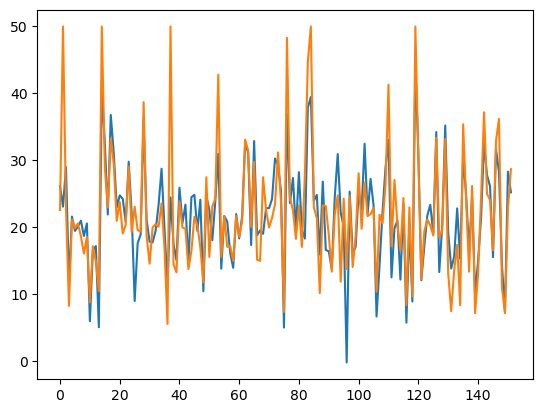

In [80]:
plt.plot(lrd.predict(X_test_norm))
plt.plot(y_test)

In [81]:
conc = pd.read_csv('concreteData.csv', header=None)
yacht = pd.read_csv('yachtData.csv', header=None)

In [82]:
X = conc.values[:, :-1]
y = conc.values[:, -1]
y = y.reshape(-1,1)

d = data_manipulation()
X_train, X_test, y_train, y_test = d.splitData(X, y)
X_train_norm, X_test_norm = d.normalize_train_test(X_train, X_test)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 6977.53it/s]


(array([35.19963107,  6.95159873,  3.65518877,  0.36268416, -5.18068931,
         3.64871823, -1.37258636, -2.71311163,  6.54414384]),
 None)

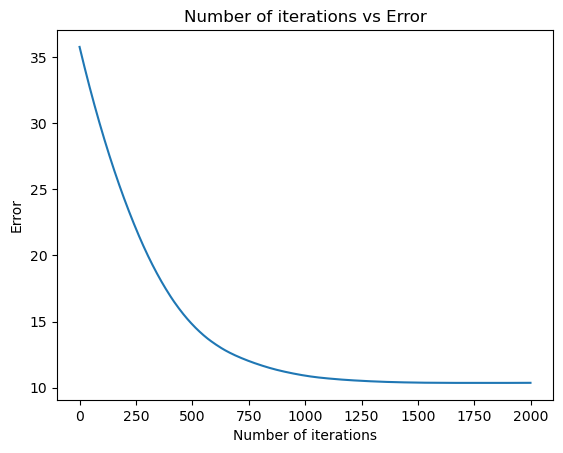

In [83]:
lr_conc = LinearRegression(alpha=0.001, n_iters= 2000, error_metric='mae', l2=0.01)
lr_conc.fit(X_train_norm, y_train)

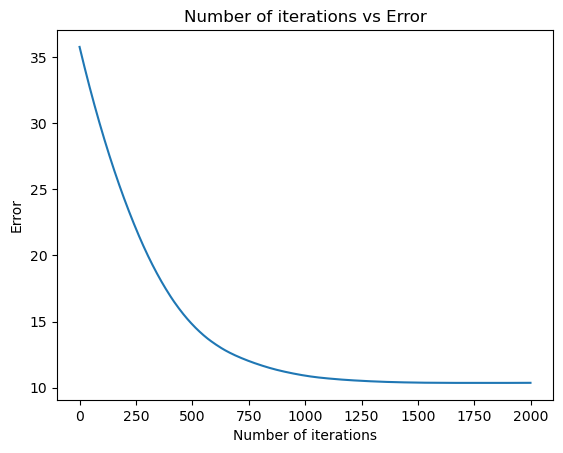

In [84]:
lr_conc.plot_cost()

In [85]:
lr_conc.model_parameter()

Learing rate is: 0.001
No. of Iterations: 2000
Error:mae = 10.364611306871346
Weights for the model are:[35.19963107  6.95159873  3.65518877  0.36268416 -5.18068931  3.64871823
 -1.37258636 -2.71311163  6.54414384]


In [86]:
act = pd.DataFrame(lr_conc.predict(X_test_norm).reshape(-1,1), columns=['Actual'])
pre = pd.DataFrame(y_test.reshape(-1,1), columns=['Predicted'])
prediction_df = pd.concat([act, pre], axis=1)
prediction_df['Error'] = prediction_df['Predicted'] - prediction_df['Actual']
n = np.asarray(prediction_df['Error'])
n = np.abs(n)
n.mean()

8.062813707664649

In [87]:
X = yacht.values[:, :-1]
y = yacht.values[:, -1]
y = y.reshape(-1,1)

d = data_manipulation()
X_train, X_test, y_train, y_test = d.splitData(X, y)
X_train_norm, X_test_norm = d.normalize_train_test(X_train, X_test)

100%|████████████████████████████████████████████████████████████████████████████| 3500/3500 [00:00<00:00, 8443.21it/s]


(array([ 9.8639263 ,  0.79672398, -0.5767798 , -0.42555839, -0.10431599,
        -0.62048646, 11.3510537 ]),
 None)

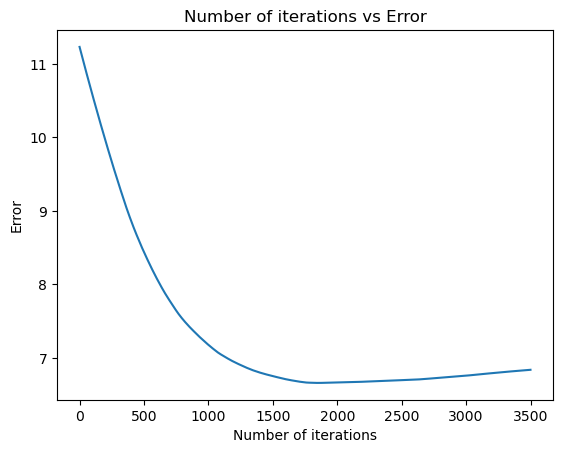

In [88]:
lr_yacht = LinearRegression(alpha=0.0003, n_iters= 3500, error_metric='mae')
lr_yacht.fit(X_train_norm, y_train)

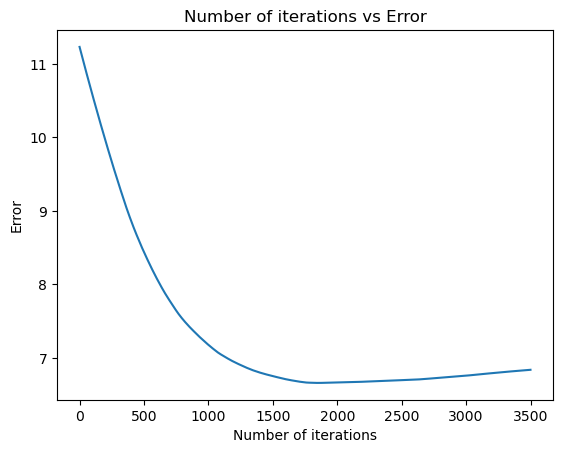

In [89]:
lr_yacht.plot_cost()

In [90]:
lr_yacht.model_parameter()

Learing rate is: 0.0003
No. of Iterations: 3500
Error:mae = 6.838433886804566
Weights for the model are:[ 9.8639263   0.79672398 -0.5767798  -0.42555839 -0.10431599 -0.62048646
 11.3510537 ]
